<a href="https://colab.research.google.com/github/vinisunday/Demanda_de_bicicletas/blob/main/01_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      16511 non-null  float64
 3   yr          17379 non-null  int64  
 4   mnth        16511 non-null  float64
 5   hr          16511 non-null  float64
 6   holiday     17379 non-null  int64  
 7   weekday     16511 non-null  float64
 8   workingday  17379 non-null  int64  
 9   weathersit  16511 non-null  float64
 10  temp        16511 non-null  float64
 11  atemp       16511 non-null  float64
 12  hum         16511 non-null  float64
 13  windspeed   16511 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(9), int64(7), object(1)
memory usage: 2.3+ MB


# Tratamento prelimininar dos dados

Tratamento para deixar os dados legíveis nos gráficos, trocando os dias e meses para sua forma verbal

In [6]:
dias_semana = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}

In [7]:
df['weekday'] = df['weekday'].map(dias_semana)

In [8]:
meses ={
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

In [9]:
df['mnth'] = df['mnth'].map(meses)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0,Janeiro,0.0,0,Domingo,0,1.0,0.240000,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1.0,0,Janeiro,1.0,0,Domingo,0,1.0,0.220000,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1.0,0,Janeiro,2.0,0,Domingo,0,1.0,0.220000,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1.0,0,Janeiro,3.0,0,Domingo,0,1.0,1.216284,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1.0,0,Janeiro,4.0,0,Domingo,0,NaN,0.240000,NaN,0.75,0.0,0,1,1


In [10]:
estacoes = {
    1: 'Primavera',
    2: 'Verão',
    3: 'Outono',
    4: 'Inverno'
}

In [11]:
df['season'] = df['season'].map(estacoes)

# Gráfico hora, dia, mês e dias úteis




In [17]:
agrupado_mes = df.groupby('mnth')[['casual', 'registered']].sum().reset_index()

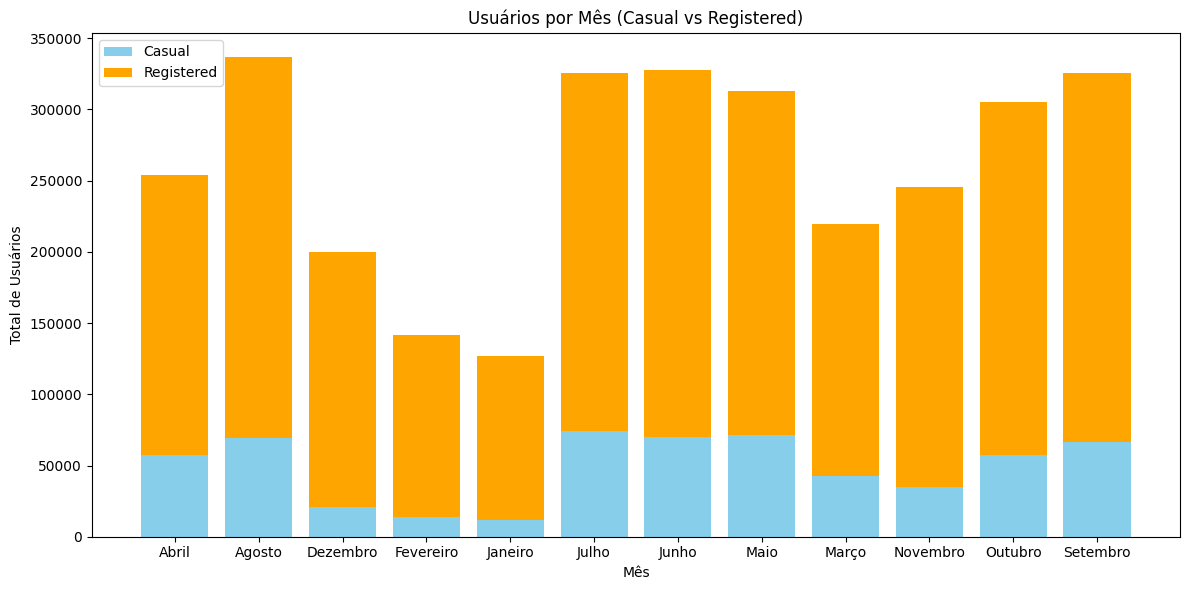

In [19]:
plt.figure(figsize=(12, 6))

plt.bar(agrupado_mes['mnth'], agrupado_mes['casual'], label='Casual', color='skyblue')
plt.bar(agrupado_mes['mnth'], agrupado_mes['registered'],
        bottom=agrupado_mes['casual'], label='Registered', color='orange')


plt.xlabel('Mês')
plt.ylabel('Total de Usuários')
plt.title('Usuários por Mês (Casual vs Registered)')
plt.legend()
plt.tight_layout()
plt.show()

Alguns pontos importantes ao analisar esse gráfico os meses de "Maio, junho, julho, agosto e setembro" são os meses em que os usuários casuais aumentam e estabilizam-se, provavelmente isso se dá ao fato de esses meses compreendem as férias, o verão e outono sendo agosto o mês em que mais se utilizam as bicicletas, vamos analisar esse mês

In [23]:
df[df['mnth'] == 'Agosto'].head(50)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4994,4995,2011-08-01,Outono,0,Agosto,0.0,0,Terça-feira,1,1.0,0.72,0.6818,0.70,0.2239,7,22,29
4995,4996,2011-08-01,Outono,0,Agosto,1.0,0,Terça-feira,1,1.0,0.72,0.6970,0.74,0.1940,5,12,17
4996,4997,2011-08-01,Outono,0,Agosto,2.0,0,Terça-feira,1,1.0,0.70,0.6667,0.74,0.1045,4,7,11
4997,4998,2011-08-01,Outono,0,Agosto,3.0,0,Terça-feira,1,1.0,0.70,0.6667,0.79,0.1642,0,4,4
4998,4999,2011-08-01,Outono,0,Agosto,4.0,0,Terça-feira,1,1.0,0.66,0.6061,0.83,0.1343,2,2,4
5000,5001,2011-08-01,Outono,0,Agosto,6.0,0,Terça-feira,1,1.0,0.66,0.6061,0.83,NaN,3,97,100
5001,5002,2011-08-01,Outono,0,Agosto,7.0,0,Terça-feira,1,1.0,0.74,0.6818,0.62,0.0000,24,258,282
5002,5003,2011-08-01,Outono,0,Agosto,8.0,0,Terça-feira,1,1.0,0.80,0.7273,0.43,0.1940,35,347,382
5004,5005,2011-08-01,Outono,0,Agosto,NaN,0,Terça-feira,1,1.0,0.86,0.7576,0.36,0.1642,27,70,97
5005,5006,2011-08-01,Outono,0,Agosto,11.0,0,Terça-feira,1,1.0,0.88,0.7727,0.32,0.1642,53,66,119


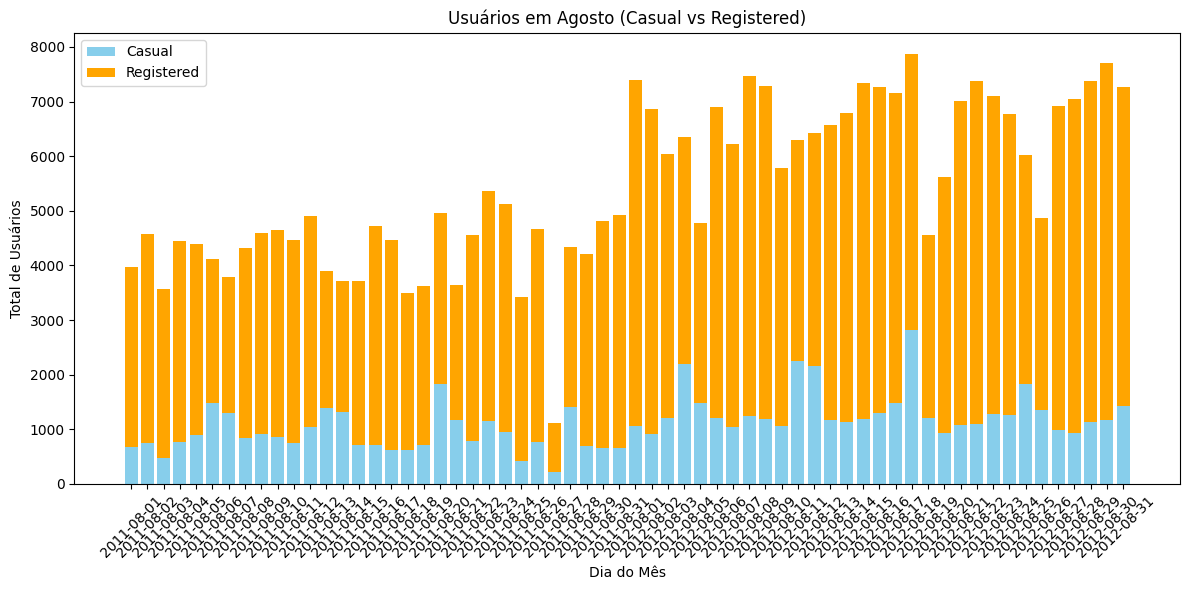

In [25]:

df_agosto = df[df['mnth'] == "Agosto"]

agrupado_agosto = df_agosto.groupby('dteday')[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(12, 6))


plt.bar(agrupado_agosto['dteday'], agrupado_agosto['casual'], label='Casual', color='skyblue')
plt.bar(agrupado_agosto['dteday'], agrupado_agosto['registered'], bottom=agrupado_agosto['casual'], label='Registered', color='orange')

plt.xlabel('Dia do Mês')
plt.ylabel('Total de Usuários')
plt.title('Usuários em Agosto (Casual vs Registered)')
plt.legend()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analisando o mês de agosto por completo, vemos que o dia em que se foi mais utilizado foi o dia 17 de agosto de 2012

In [12]:
df_agrupado_hora = df.groupby('hr')['cnt'].sum().reset_index()

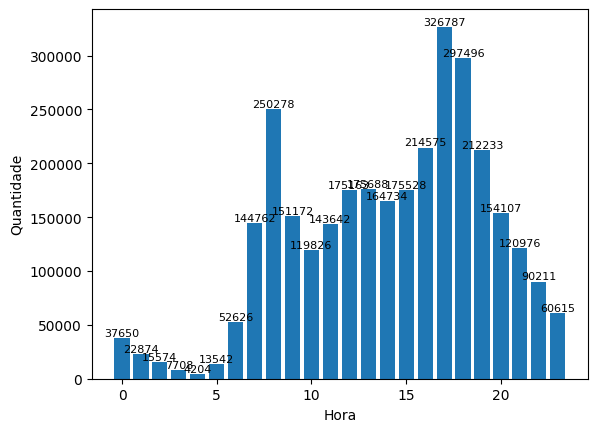

In [13]:
plt.bar(df_agrupado_hora['hr'], df_agrupado_hora['cnt'])
for i in range(len(df_agrupado_hora)):
    plt.text(df_agrupado_hora['hr'][i], df_agrupado_hora['cnt'][i] + 10,
             str(df_agrupado_hora['cnt'][i]),
             ha='center', va='bottom', fontsize=8, color='black')
plt.xlabel('Hora')
plt.ylabel('Quantidade')
plt.show()

Percebe-se nesse gráfico que as horas de pico, no qual registra-se maior número de usários são as 8,17 e as 18 horas, horários que as pessoas estão indo e saindo do trabalho

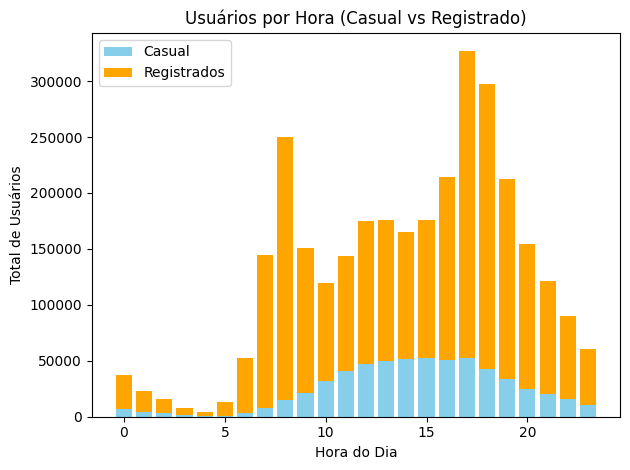

In [14]:
casuais_registrados = df.groupby('hr')[['casual', 'registered']].sum().reset_index()


plt.bar(casuais_registrados['hr'], casuais_registrados['casual'], label='Casual', color='skyblue')
plt.bar(casuais_registrados['hr'], casuais_registrados['registered'],
        bottom=casuais_registrados['casual'], label='Registrados', color='orange')


plt.xlabel('Hora do Dia')
plt.ylabel('Total de Usuários')
plt.title('Usuários por Hora (Casual vs Registrado)')
plt.legend()
plt.tight_layout()
plt.show()


ao realizar a distinção entre os usuários cadastrados dos usuários casuais, percebe-se que 1- São os maiores usuários, 2- são os que mais utilizam, provalvemente para fazer o trajeto de ida e volta do trabalho e 3- que os usuários não cadastrados costumam usar das 11 as 17, apresentado pouca variância pode-se dizer que, dado o horário é se utilizado para passeio ou trajetos curtos, vamos analisar um gráfico que mostra a condição climática para averiguar se a hipótese está correta, como vimos anteriormente que o mês em que se mais foi usado foi agosto e o dia 17 de 2012, vamos analisar os horários desse dia.

In [29]:
df_agosto_17_2012 = df[
    (df['mnth'] == 'Agosto') &
    (df['dteday'] == '2012-08-17') &
    (df['hr'].isin([8, 17, 18]))
]


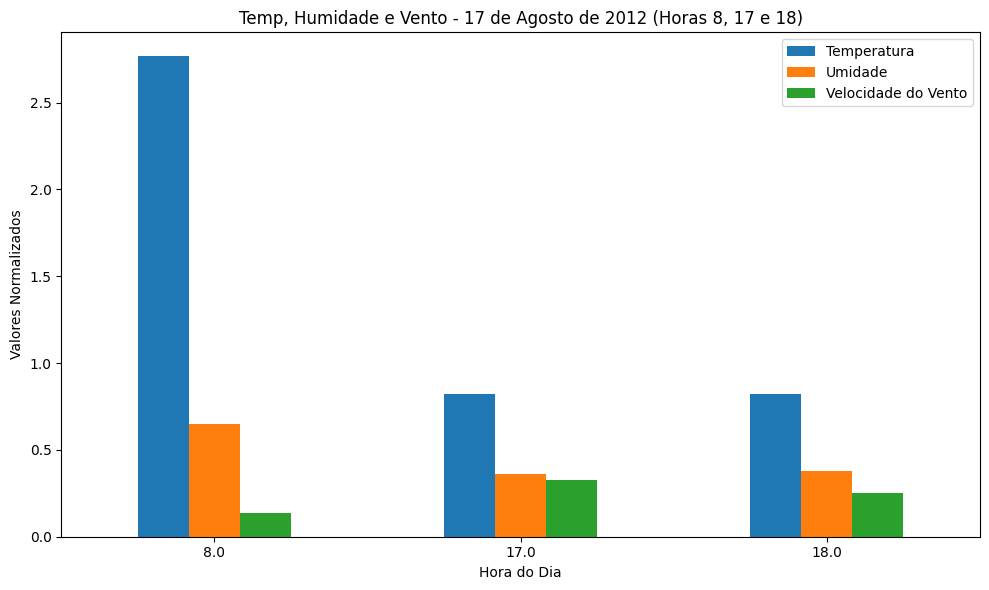

In [31]:

dados_plot = df_agosto_17_2012[['hr', 'temp', 'hum', 'windspeed']].set_index('hr')


dados_plot.plot(kind='bar', figsize=(10, 6))


plt.title('Temp, Humidade e Vento - 17 de Agosto de 2012 (Horas 8, 17 e 18)')
plt.xlabel('Hora do Dia')
plt.ylabel('Valores Normalizados')
plt.xticks(rotation=0)
plt.legend(['Temperatura', 'Umidade', 'Velocidade do Vento'])
plt.tight_layout()
plt.show()


aqui vemos que a temperatura está amena, agora vamos fazer essas mesmas análises para o menor mês e com menor uso, sendo o mês de Janeiro, primeiro mês do ano, período subsequente as festas e férias de fim de ano

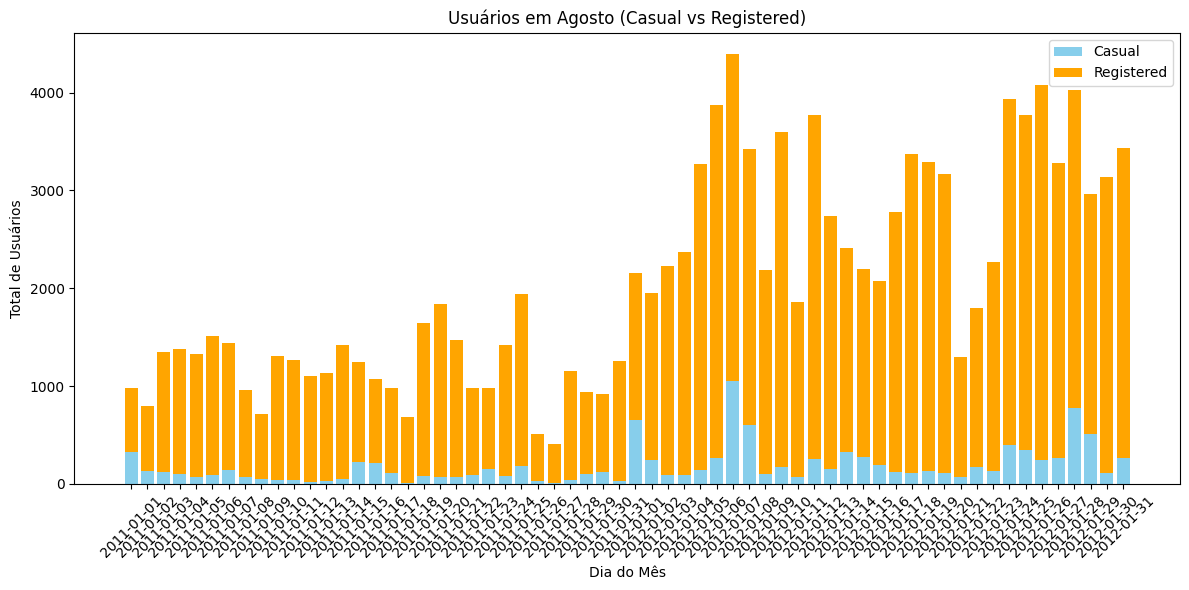

In [32]:

df_agosto = df[df['mnth'] == "Janeiro"]

agrupado_agosto = df_agosto.groupby('dteday')[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(12, 6))


plt.bar(agrupado_agosto['dteday'], agrupado_agosto['casual'], label='Casual', color='skyblue')
plt.bar(agrupado_agosto['dteday'], agrupado_agosto['registered'], bottom=agrupado_agosto['casual'], label='Registered', color='orange')

plt.xlabel('Dia do Mês')
plt.ylabel('Total de Usuários')
plt.title('Usuários em Agosto (Casual vs Registered)')
plt.legend()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aqui temos um resumo dos dois anos, vemos que no ano de 2012 o uso foi maior sendo o dia de maior uso o dia 6

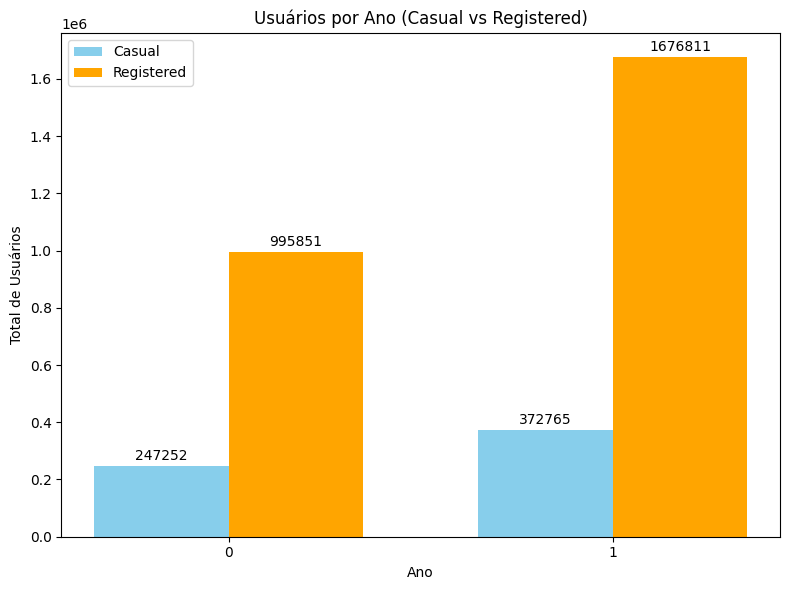

In [40]:
agrupado_ano = df.groupby('yr')[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(agrupado_ano['yr']))

casual_bars = plt.bar(index, agrupado_ano['casual'], bar_width, label='Casual', color='skyblue')
registered_bars = plt.bar(index + bar_width, agrupado_ano['registered'], bar_width, label='Registered', color='orange')

plt.xlabel('Ano')
plt.ylabel('Total de Usuários')
plt.title('Usuários por Ano (Casual vs Registered)')
plt.xticks(index + bar_width / 2, agrupado_ano['yr'])
plt.legend()
plt.tight_layout()

for bar in casual_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, f'{yval:.0f}', ha='center', va='bottom')

for bar in registered_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, f'{yval:.0f}', ha='center', va='bottom')


plt.show()

Nesse gráfico vemos que os usuários casuais aumentou de de 247 mil para 372 mil, uma evolução de aproximadamente 50%, uma evolução considerável da mesma forma os usuários registrados aumentaram de 995 mil para 1 milhão e 500 mil, representando um aumento de 50% também, importante analisar estratégias que foram aplicadas e, como vimos anteriormente, aplicar estrátegias para atrair usuários no mês de janeiro e aproveitar o mês de maior uso como agosto.